In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import time
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


*Your goal is to find ideal locations for a set of drone depots, based on the coordinates of the clients. The simulated data set is in the Methods/Data/Drone delivery folder at the Documents tab of the course’s Oma workspace. Each row starts with a customer identifier, followed by the geographical locations of nearly 6,000 clients.*

### 1. Visualize the client locations by making a two-dimensional scatterplot

In [2]:
# Loading the dataset
df = pd.read_csv('drone_delivery_v1.csv', sep=';')
df.head(10)

clientid           x           y
0         1  622.771572  164.857623
1         2  416.357298  630.193634
2         3  292.735020  567.333231
3         4  737.211288  166.225676
4         5  540.475375  682.912298
5         6  535.469492  318.439661
6         7  640.380050  870.833221
7         8  235.772075  359.048203
8         9  481.896884  661.491838
9        10  730.032789  312.177817

In [3]:
df.describe()

clientid            x            y
count  5956.000000  5956.000000  5956.000000
mean   2978.500000   508.823177   427.554772
std    1719.493433   271.061462   289.044640
min       1.000000     0.017692     0.043285
25%    1489.750000   282.582920   170.079921
50%    2978.500000   518.100892   397.786441
75%    4467.250000   727.156497   669.982518
max    5956.000000   999.533215   999.731720

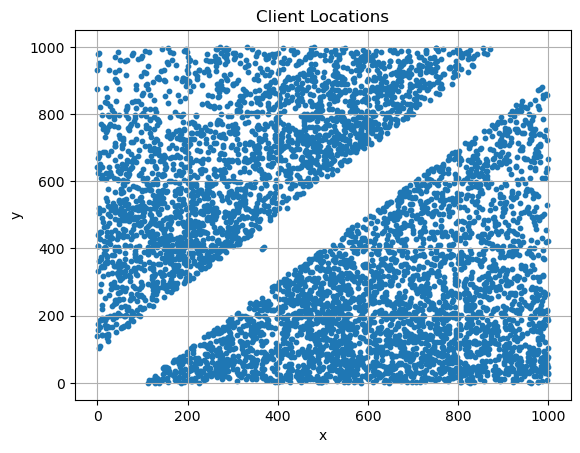

In [4]:
# Visualization using matplotlib
plt.scatter(x=df['x'], y=df['y'], s =10)
plt.title('Client Locations')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

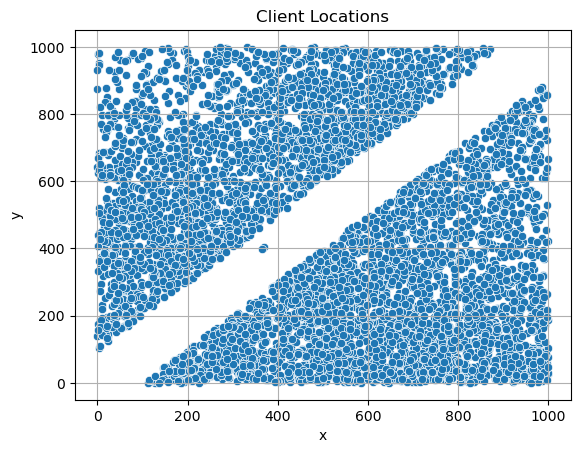

In [5]:
# Visualization using seaborn
sns.scatterplot(data=df, x='x', y='y')
plt.title('Client Locations')
plt.grid()
plt.show()

#### Q: Can you give a geographic interpretation of what you see?

=> To interprete the plot geographically, the plot has x and y axes, both range from 0 to 1000. The dots scattered across the plot represent individual client locations. This plot represent the distribution of client locations across the 'x' and 'y' axes, except along a diagnol line running from approximately (0, 100) to (900, 1000)

#### Using k-means clustering, find optimal locations (i.e. x and y coordinates) for three drone depots. Each depot should serve its surrounding clients.

*`Hint`: The centroids serve as the depot locations. You will later need to change the number of depots, so design your program in such a way that you just need to modify a single value to do that.*

We are using `Elbow Method` to determine the optimal number of clusters/depots

In [6]:
# Preprocessing the observations
df.drop(columns=['clientid'], inplace=True)# drop clientid
colnames = df.columns.values # save column headings into a list as they will be lost

To account for variations in measurements units and scale, it is common practice prior to machine learning to standardise the data. In our case, we don't need it as the data have common units and scale.

In [15]:
# Standardizing the data if necessary (not needed in this case)
#scaler = StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df))
#df_scaled.head(10)

In [8]:
#df_scaled.describe()

Number of clusters: 1, Computation Time: 0.0470 seconds
Number of clusters: 2, Computation Time: 0.0507 seconds
Number of clusters: 3, Computation Time: 0.0685 seconds
Number of clusters: 4, Computation Time: 0.0897 seconds
Number of clusters: 5, Computation Time: 0.0974 seconds
Number of clusters: 6, Computation Time: 0.0775 seconds
Number of clusters: 7, Computation Time: 0.0900 seconds
Number of clusters: 8, Computation Time: 0.1127 seconds
Number of clusters: 9, Computation Time: 0.1524 seconds


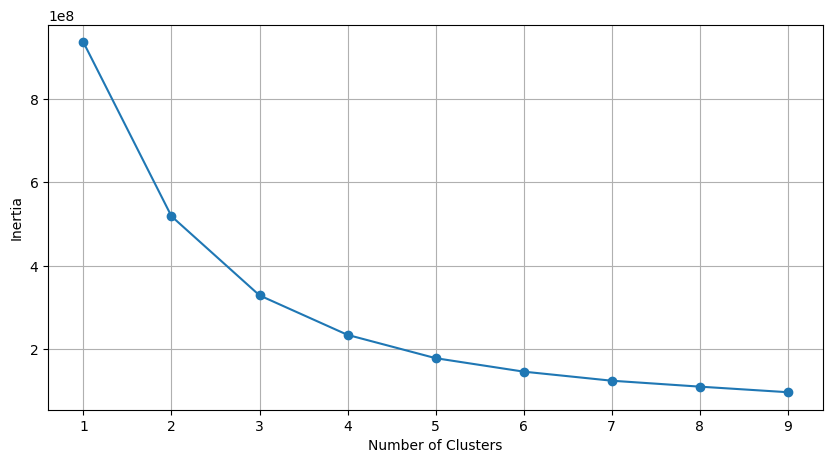

In [9]:
# Elbow method
inertia = []
means = []
k_values = range(1, 10) # change the range of k_values for more clusters.

for k in k_values:
    start_time = time.time() # Start time for computation

    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df)

    means.append(k)
    inertia.append(kmeans.inertia_)

    end_time = time.time() # End time for computation

    # Compute and display the computation time
    elapsed_time = end_time - start_time
    print(f"Number of clusters: {k}, Computation Time: {elapsed_time:.4f} seconds")

# Generate the elbow plot
fig=plt.subplots(figsize=(10,5))
plt.plot(means, inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In the plot above, we can see that the inertia (sum of squared distances to the nearest cluster center) decreases as we increase the number of clusters. We can see that there is a small change in inertia and slope from 4 onwards.

We can also see a small change in computation time when the number of depots increases. The computation time increases when the number of depots increases for the first few increment. However, after few increase in clusters, the computation time goes up and down.

In [10]:
# Get the centerpoints/centroids(depot_locations)  of the clusters
centroids = kmeans.cluster_centers_

# Output the centerpoints
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1} location: x = {centroid[0]}, y = {centroid[1]}")

Centroid 1 location: x = 257.8347650616406, y = 99.66997033408234
Centroid 2 location: x = 598.3457303211568, y = 878.5588656179604
Centroid 3 location: x = 851.7413490220022, y = 139.47961700673108
Centroid 4 location: x = 659.405605932437, y = 364.9823808660504
Centroid 5 location: x = 408.21768243156026, y = 676.5092033423759
Centroid 6 location: x = 867.5830172958413, y = 592.4475465714556
Centroid 7 location: x = 531.2362686660356, y = 140.13989154648334
Centroid 8 location: x = 171.69624931407145, y = 806.4897245120535
Centroid 9 location: x = 156.26382641762115, y = 441.1684247764317


In [11]:
# Create a pandas dataframe for centroids with columns saved earlier
centroids_df = pd.DataFrame(centroids, columns = colnames)
centroids_df

x           y
0  257.834765   99.669970
1  598.345730  878.558866
2  851.741349  139.479617
3  659.405606  364.982381
4  408.217682  676.509203
5  867.583017  592.447547
6  531.236269  140.139892
7  171.696249  806.489725
8  156.263826  441.168425

### 2. Attach the information on the closest depot to each client. That is, generate a data frame that is similar to the original one with the exception that it has an additional column that contains the identifier of the depot nearest to the client. Print the first 10 rows of the new data frame.

In [12]:
# copy the original dataframe
new_df = df.copy()

# add cluster labels to the origin DataFrame
new_df['closest_depot'] = kmeans.labels_

# print the first 10 rows of the new data frame
new_df.head(10)

x           y  closest_depot
0  622.771572  164.857623              6
1  416.357298  630.193634              4
2  292.735020  567.333231              4
3  737.211288  166.225676              2
4  540.475375  682.912298              4
5  535.469492  318.439661              3
6  640.380050  870.833221              1
7  235.772075  359.048203              8
8  481.896884  661.491838              4
9  730.032789  312.177817              3

### 3. Make a scatterplot that uses three different colours. The markers with the same colour are served by the same depot.

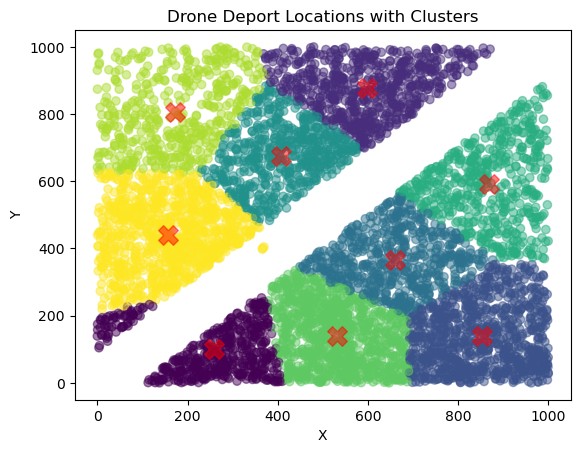

In [13]:
# scatter visualizatin with matplotlib
plt.scatter(new_df['x'], new_df['y'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroids_df['x'], centroids_df['y'], marker='X', c='red', s=200, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Drone Deport Locations with Clusters')
plt.show()

### 4. Play with the number of depots. What are the optimal locations for 10 depots, for example? Do you see a difference in the computation time when the number of depots increases?

The optimal locations of 10 depots can be easily obtained by changing the range of k_values to (1, 11) and re-running the `Elbow Method` and all the codes below it.

We can also see a small change in computation time when the number of depots increases. The computation time increases when the number of depots increases for the first few increment. However, after few increase in clusters, the computation time goes up and down.

### 5. Replace k-means with agglomreative hierarchical clustering and explore it with various depot numbers. What are your observations?

Number of clusters: 1, Computation Time: 0.5060 seconds


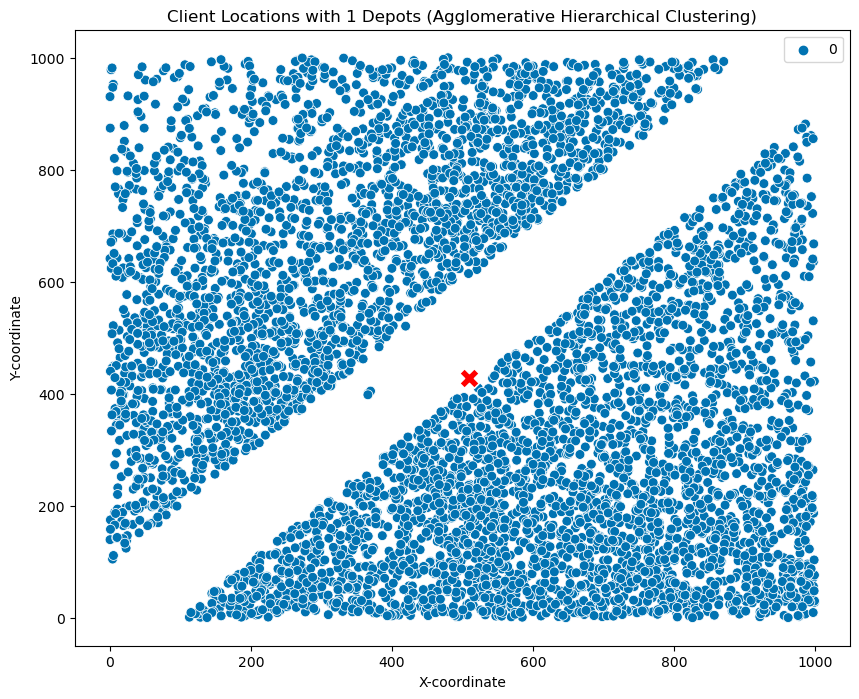

Number of clusters: 2, Computation Time: 0.5001 seconds


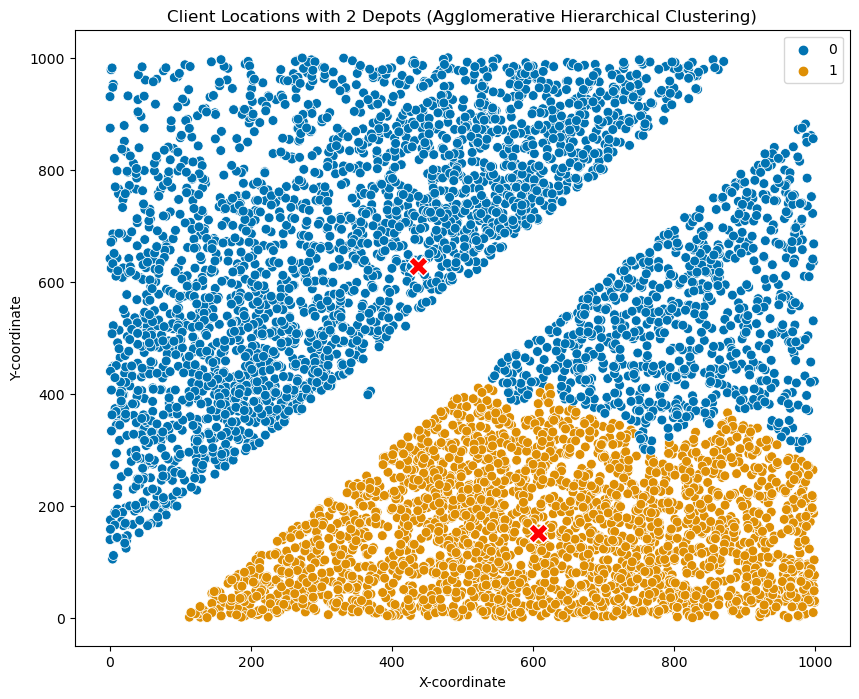

Number of clusters: 3, Computation Time: 0.4962 seconds


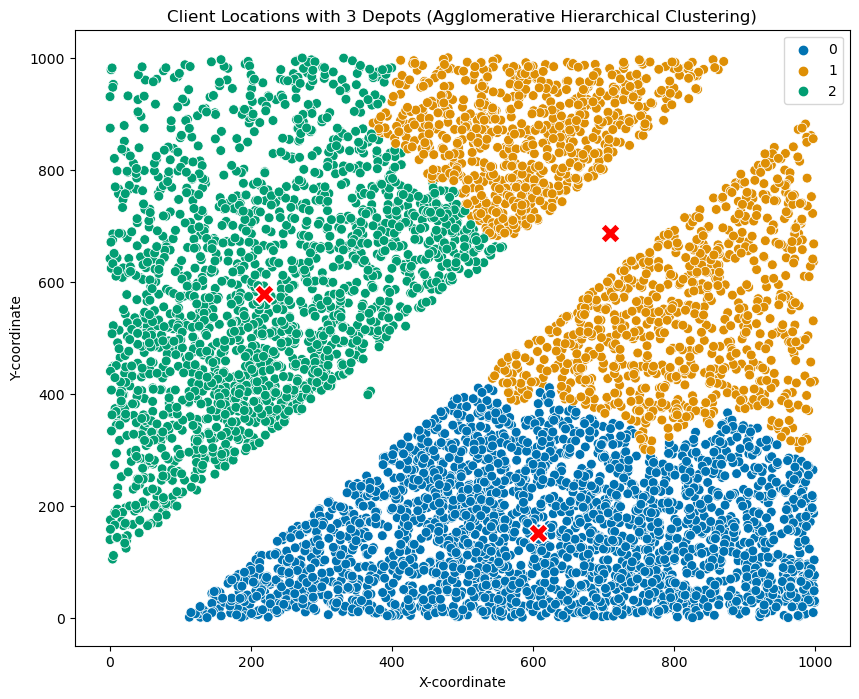

Number of clusters: 4, Computation Time: 0.4920 seconds


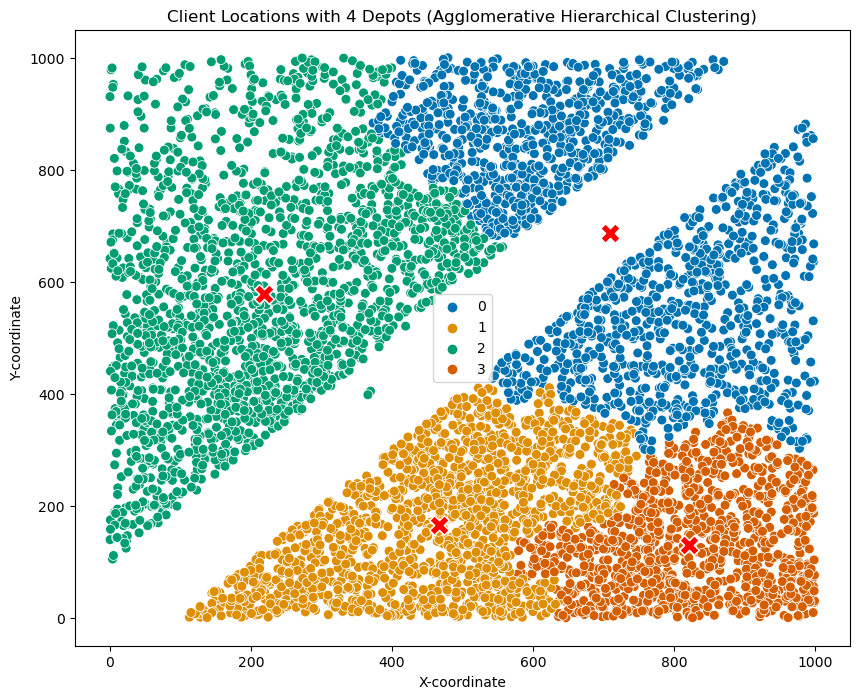

Number of clusters: 5, Computation Time: 0.4957 seconds


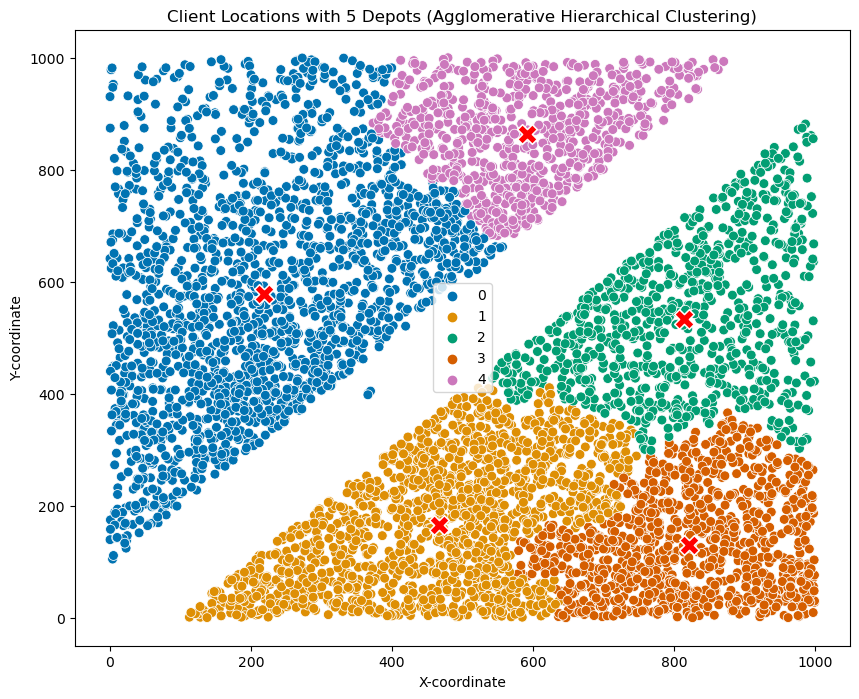

Number of clusters: 6, Computation Time: 0.5001 seconds


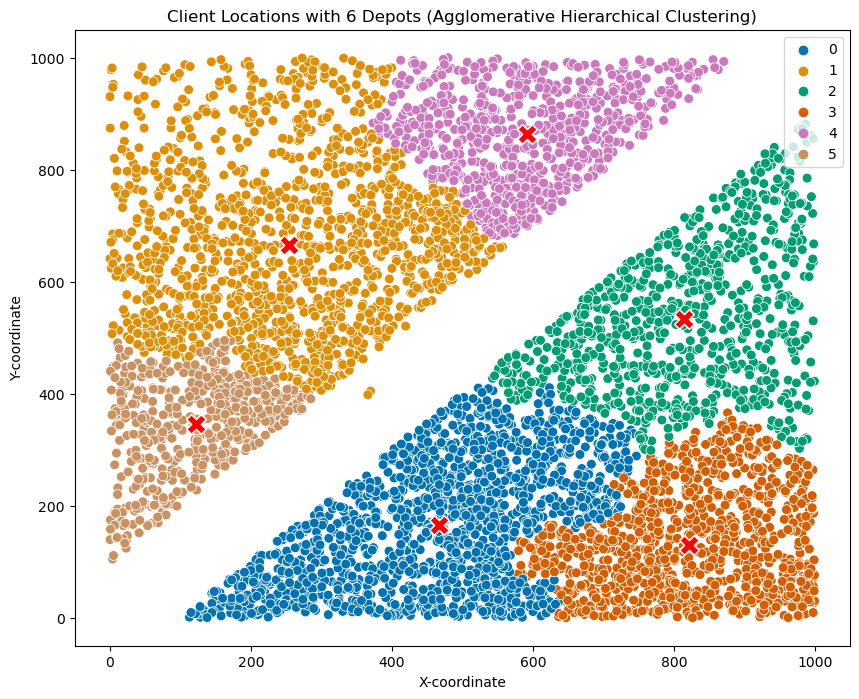

Number of clusters: 7, Computation Time: 0.5101 seconds


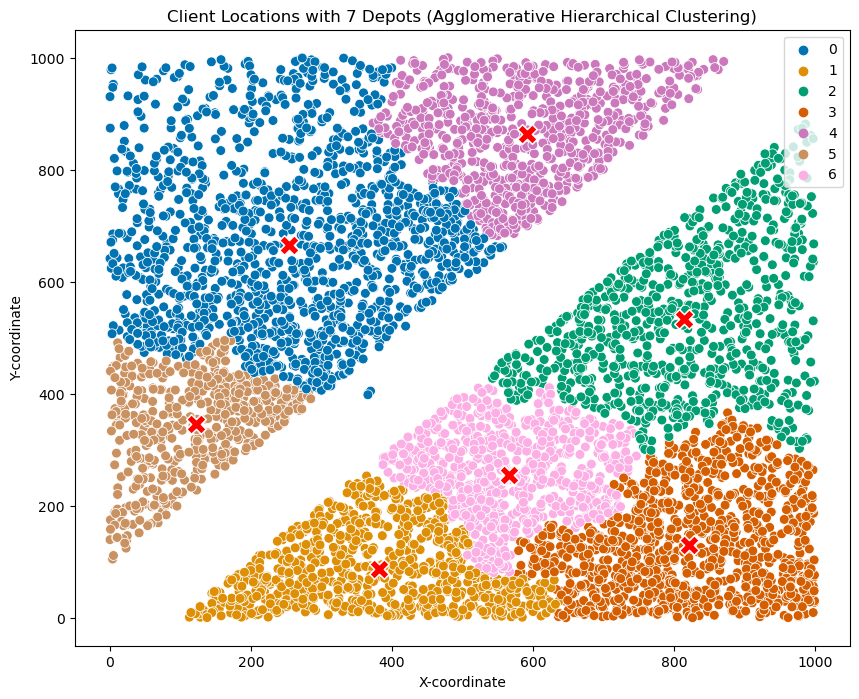

Number of clusters: 8, Computation Time: 0.5119 seconds


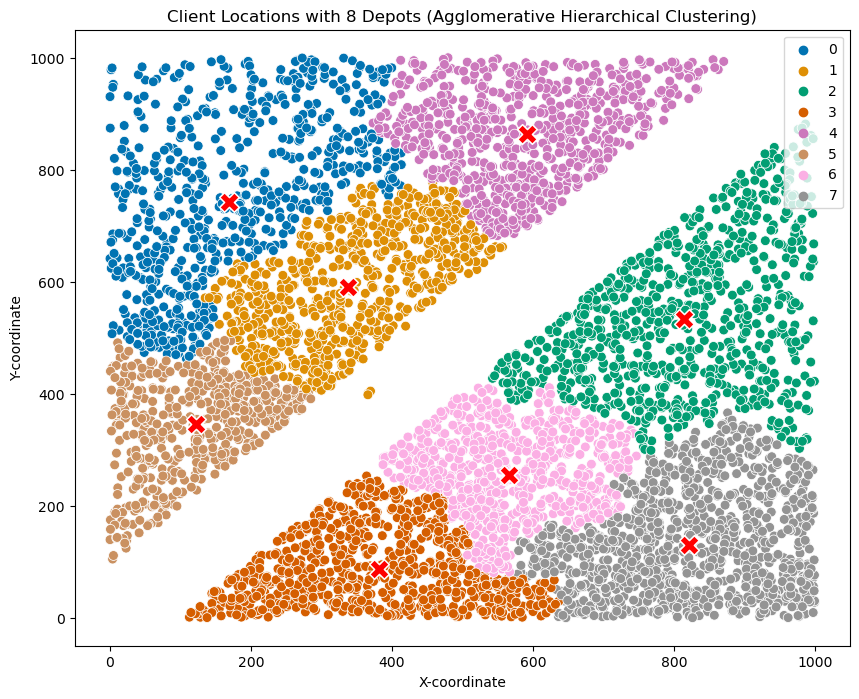

Number of clusters: 9, Computation Time: 0.5013 seconds


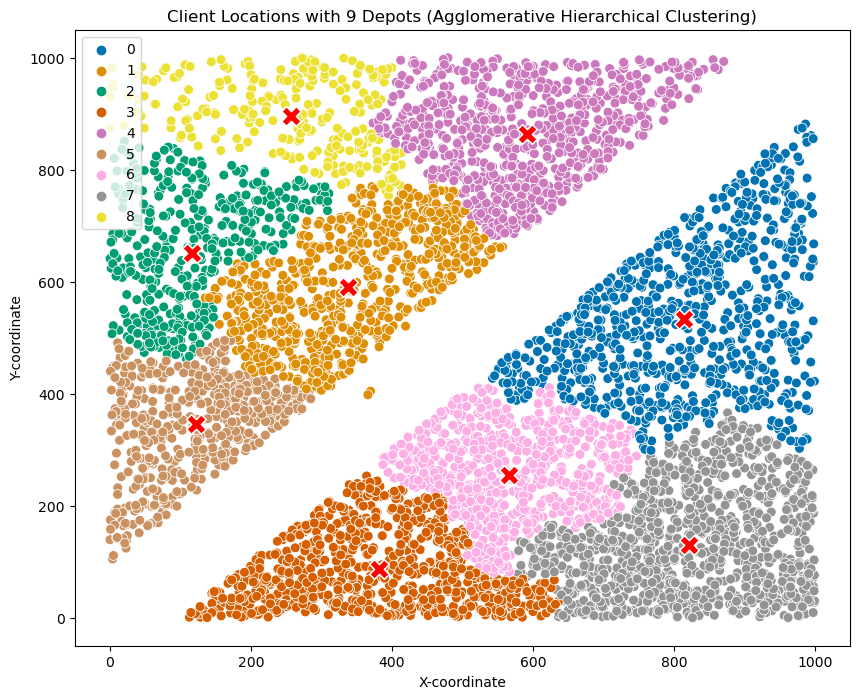

In [14]:
num_clusters = range(1, 10)

# Explore Agglomerative Hierarchical Clustering for various depot numbers
for num_cluster in num_clusters:
    start_time = time.time() # Start time for computation
    # Perform Agglomerative Hierarchical Clustering
    agglomerative_clustering = AgglomerativeClustering(n_clusters=num_cluster)
    df['depot'] = agglomerative_clustering.fit_predict(df)

    end_time = time.time() # End time for computation

    # Compute and display the computation time
    elapsed_time = end_time - start_time
    print(f"Number of clusters: {num_cluster}, Computation Time: {elapsed_time:.4f} seconds")

    # Visualize the clustered data

    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='x', y='y', hue='depot', palette='colorblind', marker='o', s=50)
    
    cluster_centers = df.groupby('depot').mean()[['x', 'y']].values
    sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='X', s=200)
    
    plt.title(f'Client Locations with {num_cluster} Depots (Agglomerative Hierarchical Clustering)')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()
    

The observations:
* As the number of clusters (depots) increases, the algorithm tends to create more fine-grained partitions of the data. However, it seemt to require further computation time.